# Install & Import Package

In [ ]:
!pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 5.0 MB/s eta 0:00:00


In [ ]:
# LIBRARY UNTUK MENGOLAH DATA
import pandas as pd
import numpy as np
import re,string #import regular expression
import Sastrawi
import joblib

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import matplotlib as mpl

#Library Untuk Split Data
from sklearn import model_selection
from sklearn.model_selection import train_test_split

#Library Ekstraksi Fitur TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder

#Library Klasifikasi Support Vector Machine
from sklearn.svm import SVC
from sklearn import svm
from sklearn.metrics import f1_score as f1
from sklearn .metrics import accuracy_score as acc
from sklearn.metrics import precision_score as prec
from sklearn.metrics import recall_score as recall
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics


#Library HyperParameter Tuning
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import timeit

import warnings
warnings.filterwarnings('ignore')

# Import Dataset "Hasil Prepro Aspek Satisfaction

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ulasan_aspek_satisfaction = pd.read_csv("/content/drive/MyDrive/TA_ADIN_ASBA_STARBUCKS_APP/hasil_prepro_aspek_satisfaction_starbucks_app.csv")
ulasan_aspek_satisfaction.shape

(1500, 3)

In [ ]:
ulasan_aspek_satisfaction['Satisfaction'].value_counts()

0    989
1    511
Name: Satisfaction, dtype: int64

In [ ]:
#detect missing values
ulasan_aspek_satisfaction.isna().sum()

Ulasan          0
stemming        0
Satisfaction    0
dtype: int64

# Inisialisasi Data

In [ ]:
x_satisfaction = ulasan_aspek_satisfaction['stemming'] #hasil stemming
y_satisfaction = ulasan_aspek_satisfaction['Satisfaction'].values #labelnya

# Split Data

In [ ]:
from sklearn.model_selection import train_test_split

#Perbandingan data train dan data test sebesar 8:2
x_satisfaction_train, x_satisfaction_test, y_satisfaction_train, y_satisfaction_test = train_test_split(
    ulasan_aspek_satisfaction['stemming'],
    ulasan_aspek_satisfaction['Satisfaction'],
    test_size=0.2)

train_df = pd.DataFrame()
train_df['Ulasan'] = x_satisfaction_train
train_df['sentiment'] = y_satisfaction_train
test_df = pd.DataFrame()
test_df['Ulasan'] = x_satisfaction_test
test_df['sentiment'] = y_satisfaction_test

# Feature TF-IDF "x_satisfaction"

In [ ]:
#merubah nilai x_satisfaction menjadi sebuah angka bukan teks
tfidf_vect = TfidfVectorizer(use_idf=True)
tfidf_vect.fit(x_satisfaction_train)
x_satisfaction_train_vectorized = tfidf_vect.transform(x_satisfaction_train)
x_satisfaction_test_vectorized = tfidf_vect.transform(x_satisfaction_test)

In [ ]:
print (x_satisfaction_train_vectorized)

  (0, 1332)	0.5874435077976256
  (0, 952)	0.5632744896796132
  (0, 687)	0.44680781782462314
  (0, 436)	0.3115941990755589
  (0, 63)	0.20224688738235652
  (1, 1349)	0.4737242312600588
  (1, 1331)	0.3501320041793632
  (1, 1306)	0.45795770327310903
  (1, 1292)	0.4341837743189626
  (1, 541)	0.3961002027184386
  (1, 281)	0.3128206417482383
  (3, 1331)	0.28433066770151977
  (3, 1102)	0.222982453924182
  (3, 823)	0.33816648169339897
  (3, 654)	0.7051726833519373
  (3, 572)	0.38469584434664084
  (3, 436)	0.21280742462714425
  (3, 281)	0.2540313392589232
  (4, 1512)	0.17486358848924263
  (4, 1429)	0.15810832738817984
  (4, 1250)	0.2858152933780334
  (4, 1101)	0.27630276578332563
  (4, 957)	0.3153639029768199
  (4, 865)	0.14082349882444056
  (4, 824)	0.2619590779784946
  :	:
  (1196, 1155)	0.47008339889936546
  (1196, 968)	0.4973423099001937
  (1196, 878)	0.4973423099001937
  (1196, 63)	0.16184178218932327
  (1197, 1025)	0.9074886242165096
  (1197, 63)	0.4200766560017665
  (1198, 1248)	0.7982095

# Klasifikasi SVM dengan K-Fold Cross Validation Menggunakan Kernel Linear

Kernel Linear memiliki akurasi paling tinggi sebesar 0.9208 (Tanpa Hyperparamater Tunning)

In [ ]:
#Membuat Model dg Kernel Linear
clf_linear = SVC(kernel='linear')

#Evaluasi dg K-Fold Cross Validation
#Menggunakan Data Train untuk Melatih Model
cv_linear = cross_val_score(clf_linear, x_satisfaction_train_vectorized, y_satisfaction_train, scoring='accuracy', cv=5)

#Hasil Setelah dilakukan 5x Fold (cv=5)
print("Accuracy Score Linear of : %0.4f" % (cv_linear.mean()))

Accuracy Score Linear of : 0.7833


# Klasifikasi SVM dengan K-Fold Cross Validation Menggunakan Kernel Polynomial

In [ ]:
#Membuat Model dg Kernel Polynomial
clf_poly = SVC(kernel='poly')

#Evaluasi dg K-Fold Cross Validation
#Menggunakan Data Train untuk Melatih Model
cv_poly = cross_val_score(clf_poly, x_satisfaction_train_vectorized, y_satisfaction_train, scoring='accuracy', cv=5)

#Hasil Setelah 5lipatan/fold (nilai cv=5)
print("Accuracy Score Poly of : %0.4f" % (cv_poly.mean()))

Accuracy Score Poly of : 0.7733


# Klasifikasi SVM dengan K-Fold Cross Validation Menggunakan Kernel RBF

In [ ]:
#Membuat Model dg Kernel rbf
clf_rbf = SVC(kernel='rbf')

#Evaluasi dg K-Fold Cross Validation
#Menggunakan Data Train untuk Melatih Model
cv_rbf= cross_val_score(clf_rbf, x_satisfaction_train_vectorized, y_satisfaction_train, scoring='accuracy', cv=5)

#Hasil Setelah 5lipatan/fold (nilai cv=5)
print("Accuracy Score RBF of : %0.4f" % (cv_rbf.mean()))

Accuracy Score RBF of : 0.8225


# Klasifikasi SVM (Hyperparameter Tunning) Menggunakan Kernel Linear

In [ ]:
#Tuning Parameter with GridSearchCV
#LINEAR KERNEL

param_grid = {'C': [0.1, 1, 10, 100],
              'kernel': ['linear'],
              'gamma' :[0.01, 0.1, 1, 10]
             }

grid = GridSearchCV(svm.SVC(), param_grid, scoring='accuracy', refit = True, verbose = 3)
# fitting the model for grid search
grid.fit(x_satisfaction_train_vectorized, y_satisfaction_train)

selected_kernel_linear = grid.best_params_['kernel']
print("Selected Kernel: ", selected_kernel_linear)
selected_C_linear = grid.best_params_['C']
print("Selected C: ", selected_C_linear)
selected_gamma_linear= grid.best_params_['gamma']
print("Selected Gamma: ", selected_gamma_linear)

best_params_linear_HT = grid.best_params_
model_looks_linear_HT= grid.best_estimator_

print(f'Best Score : {grid.best_score_}')
print("best estimator: %s" % (model_looks_linear_HT))

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.754 total time=   0.1s
[CV 2/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.729 total time=   0.0s
[CV 3/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.729 total time=   0.0s
[CV 4/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.758 total time=   0.1s
[CV 5/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.713 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.754 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.729 total time=   0.0s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.729 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.758 total time=   0.1s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.713 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.754 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;

# Klasifikasi SVM (Hyperparameter Tunning) Menggunakan Kernel Polynomial

In [ ]:
#Tuning Parameter with GridSearchCV
#Kernel Polynomial

param_grid = {'C': [0.1, 1, 10, 100],
              'kernel': ['poly'],
              'gamma' :[0.01, 0.1, 1, 10]
             }

grid = GridSearchCV(svm.SVC(), param_grid, scoring='accuracy', refit = True, verbose = 3)
# fitting the model for grid search
grid.fit(x_satisfaction_train_vectorized, y_satisfaction_train)


selected_kernel_poly = grid.best_params_['kernel']
print("Selected Kernel: ", selected_kernel_poly)
selected_C_poly= grid.best_params_['C']
print("Selected C: ", selected_C_poly)
selected_gamma_poly = grid.best_params_['gamma']
print("Selected Gamma: ", selected_gamma_poly)


best_params_poly_HT = grid.best_params_
model_looks_poly_HT= grid.best_estimator_

print(f'Best Score : {grid.best_score_}')
print("best estimator: %s" % (model_looks_poly_HT))

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ....C=0.1, gamma=0.01, kernel=poly;, score=0.650 total time=   0.1s
[CV 2/5] END ....C=0.1, gamma=0.01, kernel=poly;, score=0.650 total time=   0.1s
[CV 3/5] END ....C=0.1, gamma=0.01, kernel=poly;, score=0.650 total time=   0.1s
[CV 4/5] END ....C=0.1, gamma=0.01, kernel=poly;, score=0.646 total time=   0.1s
[CV 5/5] END ....C=0.1, gamma=0.01, kernel=poly;, score=0.646 total time=   0.2s
[CV 1/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.650 total time=   0.1s
[CV 2/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.650 total time=   0.1s
[CV 3/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.650 total time=   0.1s
[CV 4/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.646 total time=   0.1s
[CV 5/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.646 total time=   0.1s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.742 total time=   0.1s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;

# Klasifikasi SVM (Hyperparameter Tunning) Menggunakan Kernel RBF

Hyperparameter terbaik untuk aspek efficiency ada pada kernel RBF dg C=100, gamma 0.01, score=0.9275

In [ ]:
#Tuning Parameter with GridSearchCV
#Kernel RBF

param_grid = {'C': [0.1, 1, 10, 100],
              'kernel': ['rbf'],
              'gamma' :[0.01, 0.1, 1, 10]
             }

grid = GridSearchCV(svm.SVC(), param_grid, scoring='accuracy', refit = True, verbose = 3)
# fitting the model for grid search
grid.fit(x_satisfaction_train_vectorized, y_satisfaction_train)

selected_kernel_rbf = grid.best_params_['kernel']
print("Selected Kernel: ", selected_kernel_rbf)
selected_C_rbf = grid.best_params_['C']
print("Selected C: ", selected_C_rbf)
selected_gamma_rbf= grid.best_params_['gamma']
print("Selected Gamma: ", selected_gamma_rbf)

best_params_rbf_HT = grid.best_params_
model_looks_rbf_HT= grid.best_estimator_

print(f'Best Score : {grid.best_score_}')
print("best estimator: %s" % (model_looks_rbf_HT))

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.650 total time=   0.3s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.650 total time=   0.3s
[CV 3/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.650 total time=   0.3s
[CV 4/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.646 total time=   0.2s
[CV 5/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.646 total time=   0.2s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.721 total time=   0.2s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.700 total time=   0.3s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.683 total time=   0.3s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.721 total time=   0.3s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.683 total time=   0.2s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.775 total time=   0.4s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;

# K-Fold Cross Validation dengan Hyperparameter Tunning

In [ ]:
cross_val_score_linear= cross_val_score(model_looks_linear_HT, x_satisfaction_train_vectorized, y_satisfaction_train, scoring='accuracy', cv=5)
print("Accuracy Score Linear of : %0.4f" % cross_val_score_linear.mean(), cross_val_score_linear.std())

cross_val_score_poly = cross_val_score(model_looks_poly_HT, x_satisfaction_train_vectorized, y_satisfaction_train, scoring='accuracy', cv=5)
print("Accuracy Score poly of : %0.4f" % cross_val_score_poly.mean(), cross_val_score_poly.std())

cross_val_score_rbf = cross_val_score(model_looks_rbf_HT, x_satisfaction_train_vectorized, y_satisfaction_train, scoring='accuracy', cv=5)
print("Accuracy Score rbf of : %0.4f" % cross_val_score_rbf.mean(), cross_val_score_rbf.std())

Accuracy Score Linear of : 0.7833 0.015590239111558088
Accuracy Score poly of : 0.7725 0.021666666666666667
Accuracy Score rbf of : 0.8342 0.008498365855987969


# Visualisasi Pengaruh Hyperparameter Tunning pada Model Klasifikasi SVM di Aspek Efficiency

Hyperparameter tunning pada aspek efficiency hanya berpengaruh pada kernel RBF dengan kenaikan sebesar 0.0075

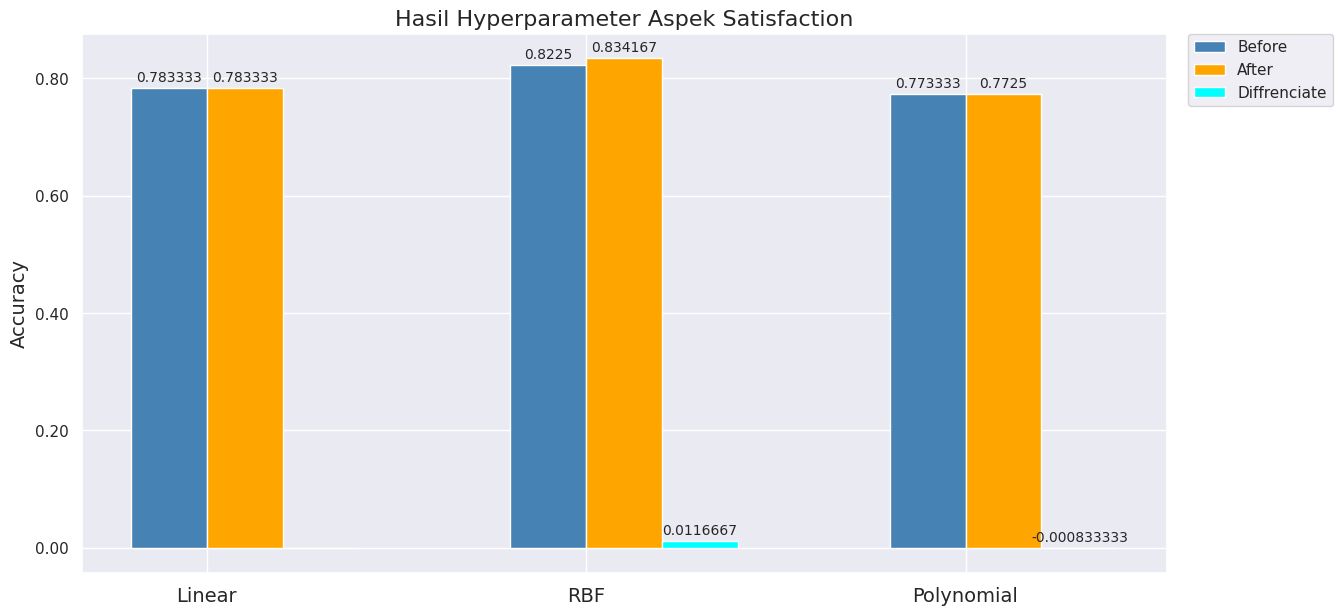

In [ ]:
import numpy as np
from matplotlib.ticker import FormatStrFormatter

import matplotlib.pyplot as plt
%matplotlib inline


name = ['Linear', 'RBF', 'Polynomial']
before_HT = [cv_linear.mean(), cv_rbf.mean(), cv_poly.mean()]
after_HT = [cross_val_score_linear.mean(), cross_val_score_rbf.mean(), cross_val_score_poly.mean()]
diff_linear = ((cross_val_score_linear.mean()-cv_linear.mean()))
diff_rbf = ((cross_val_score_rbf.mean()-cv_rbf.mean()))
diff_poly = ((cross_val_score_poly.mean()-cv_poly.mean()))
diff_HT = [diff_linear, diff_rbf, diff_poly]

x = np.arange(len(name))
width = 0.2

fig, ax = plt.subplots(figsize=(14, 7))

bfr = ax.bar(x - width/2, before_HT, width, label='Before', color='steelblue')
aftr = ax.bar(x + width/2, after_HT, width, label='After', color='orange')
diff = ax.bar(x + 0.3, diff_HT, width, label='Diffrenciate', color='cyan')

ax.set_title('Hasil Hyperparameter Aspek Satisfaction', size=16)
ax.set_ylabel('Accuracy', size=14)
ax.set_xticks(x)
ax.set_xticklabels(name, size=14)
ax.legend(fontsize=14)
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
ax.yaxis.set_major_formatter(FormatStrFormatter("%0.2f"))
for p in ax.patches:
    h = p.get_height()
    x = p.get_x()+p.get_width()/2
    if h!= 0:
      ax.annotate("%g" % p.get_height(), xy=(x,h), xytext=(0,5), textcoords="offset points",
                  ha="center", fontsize=10)

plt.show()

# Validasi Model Hyperparameter Tunning Data Test Linear Kernel

In [ ]:
grid_predictions = model_looks_linear_HT.predict(x_satisfaction_test_vectorized)

print("F1-SCORE ",f1(y_satisfaction_test,grid_predictions,average='macro') * 100)
print("ACCURACY ",acc(y_satisfaction_test,grid_predictions) * 100)
print("PRECISION ",prec(y_satisfaction_test,grid_predictions,average='macro') * 100)
print("RECALL",recall(y_satisfaction_test,grid_predictions,average='macro') * 100)

print('Confusion Matrix : \n', confusion_matrix(y_satisfaction_test, grid_predictions))
print('Report Hasil : \n',classification_report(y_satisfaction_test, grid_predictions))

F1-SCORE  77.02392215164211
ACCURACY  83.0
PRECISION  82.9082359646623
RECALL 74.59662388838596
Confusion Matrix : 
 [[201  10]
 [ 41  48]]
Report Hasil : 
               precision    recall  f1-score   support

           0       0.83      0.95      0.89       211
           1       0.83      0.54      0.65        89

    accuracy                           0.83       300
   macro avg       0.83      0.75      0.77       300
weighted avg       0.83      0.83      0.82       300



# Validasi Model Hyperparameter Tunning Data Test Polynomial Kernel

In [ ]:
grid_predictions = model_looks_poly_HT.predict(x_satisfaction_test_vectorized)

print("F1-SCORE ",f1(y_satisfaction_test,grid_predictions,average='macro') * 100)
print("ACCURACY ",acc(y_satisfaction_test,grid_predictions) * 100)
print("PRECISION ",prec(y_satisfaction_test,grid_predictions,average='macro') * 100)
print("RECALL",recall(y_satisfaction_test,grid_predictions,average='macro') * 100)

print('Confusion Matrix : \n', confusion_matrix(y_satisfaction_test, grid_predictions))
print('Report Hasil : \n',classification_report(y_satisfaction_test, grid_predictions))

F1-SCORE  77.77112137598334
ACCURACY  84.33333333333334
PRECISION  88.14484126984127
RECALL 74.56999840247084
Confusion Matrix : 
 [[208   3]
 [ 44  45]]
Report Hasil : 
               precision    recall  f1-score   support

           0       0.83      0.99      0.90       211
           1       0.94      0.51      0.66        89

    accuracy                           0.84       300
   macro avg       0.88      0.75      0.78       300
weighted avg       0.86      0.84      0.83       300



# Validasi Model Hyperparameter Tunning Data Test RBF Kernel

In [ ]:
grid_predictions = model_looks_rbf_HT.predict(x_satisfaction_test_vectorized)

print("F1-SCORE ",f1(y_satisfaction_test,grid_predictions,average='macro') * 100)
print("ACCURACY ",acc(y_satisfaction_test,grid_predictions) * 100)
print("PRECISION ",prec(y_satisfaction_test,grid_predictions,average='macro') * 100)
print("RECALL",recall(y_satisfaction_test,grid_predictions,average='macro') * 100)

print('Confusion Matrix : \n', confusion_matrix(y_satisfaction_test, grid_predictions))
print('Report Hasil : \n',classification_report(y_satisfaction_test, grid_predictions))

F1-SCORE  85.5421686746988
ACCURACY  87.66666666666667
PRECISION  84.86519607843137
RECALL 86.35976356568507
Confusion Matrix : 
 [[189  22]
 [ 15  74]]
Report Hasil : 
               precision    recall  f1-score   support

           0       0.93      0.90      0.91       211
           1       0.77      0.83      0.80        89

    accuracy                           0.88       300
   macro avg       0.85      0.86      0.86       300
weighted avg       0.88      0.88      0.88       300



# Validasi Model Hyperparameter Tunning Data Train Linear Kernel

In [ ]:
grid_predictions = model_looks_linear_HT.predict(x_satisfaction_train_vectorized)

print("F1-SCORE ",f1(y_satisfaction_train,grid_predictions,average='macro') * 100)
print("ACCURACY ",acc(y_satisfaction_train,grid_predictions) * 100)
print("PRECISION ",prec(y_satisfaction_train,grid_predictions,average='macro') * 100)
print("RECALL",recall(y_satisfaction_train,grid_predictions,average='macro') * 100)

print('Confusion Matrix : \n', confusion_matrix(y_satisfaction_train, grid_predictions))
print('Report Hasil : \n',classification_report(y_satisfaction_train, grid_predictions))

F1-SCORE  87.09528066533187
ACCURACY  89.08333333333334
PRECISION  91.81017030760421
RECALL 84.91240146687947
Confusion Matrix : 
 [[770   8]
 [123 299]]
Report Hasil : 
               precision    recall  f1-score   support

           0       0.86      0.99      0.92       778
           1       0.97      0.71      0.82       422

    accuracy                           0.89      1200
   macro avg       0.92      0.85      0.87      1200
weighted avg       0.90      0.89      0.89      1200



# Validasi Model Hyperparameter Tunning Data Train Polynomial Kernel

In [ ]:
grid_predictions = model_looks_poly_HT.predict(x_satisfaction_train_vectorized)

print("F1-SCORE ",f1(y_satisfaction_train,grid_predictions,average='macro') * 100)
print("ACCURACY ",acc(y_satisfaction_train,grid_predictions) * 100)
print("PRECISION ",prec(y_satisfaction_train,grid_predictions,average='macro') * 100)
print("RECALL",recall(y_satisfaction_train,grid_predictions,average='macro') * 100)

print('Confusion Matrix : \n', confusion_matrix(y_satisfaction_train, grid_predictions))
print('Report Hasil : \n',classification_report(y_satisfaction_train, grid_predictions))

F1-SCORE  92.74356787310155
ACCURACY  93.66666666666667
PRECISION  95.36134453781513
RECALL 91.10369278378147
Confusion Matrix : 
 [[776   2]
 [ 74 348]]
Report Hasil : 
               precision    recall  f1-score   support

           0       0.91      1.00      0.95       778
           1       0.99      0.82      0.90       422

    accuracy                           0.94      1200
   macro avg       0.95      0.91      0.93      1200
weighted avg       0.94      0.94      0.94      1200



# Validasi Model Hyperparameter Tunning Data Train RBF Kernel

In [ ]:
grid_predictions = model_looks_rbf_HT.predict(x_satisfaction_train_vectorized)

print("F1-SCORE ",f1(y_satisfaction_train,grid_predictions,average='macro') * 100)
print("ACCURACY ",acc(y_satisfaction_train,grid_predictions) * 100)
print("PRECISION ",prec(y_satisfaction_train,grid_predictions,average='macro') * 100)
print("RECALL",recall(y_satisfaction_train,grid_predictions,average='macro') * 100)

print('Confusion Matrix : \n', confusion_matrix(y_satisfaction_train, grid_predictions))
print('Report Hasil : \n',classification_report(y_satisfaction_train, grid_predictions))

F1-SCORE  95.75911789652248
ACCURACY  96.16666666666667
PRECISION  96.20056830167141
RECALL 95.36300393523312
Confusion Matrix : 
 [[763  15]
 [ 31 391]]
Report Hasil : 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       778
           1       0.96      0.93      0.94       422

    accuracy                           0.96      1200
   macro avg       0.96      0.95      0.96      1200
weighted avg       0.96      0.96      0.96      1200

